<a href="https://colab.research.google.com/github/NandaFerry/ClassificacaoConducao/blob/main/ComportamentoCondutor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes necessários para instalação

In [1]:
# Instalando os pacotes necessários

!pip3 install pandas
!pip3 install graphviz
!pip3 install pydotplus
!pip install --upgrade scikit-learn==0.20.3
!pip3 install shap

import shap
import seaborn as sns
import pandas as pd
import pydotplus
import numpy as np
import xgboost as xgb
import graphviz

from collections import Counter
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import metrics, svm
from six import StringIO
from IPython.display import Image
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled s

## Lendo o conjunto de dados

In [45]:
df = pd.read_csv("dados.csv")

# EvenPaceStyle = 1
# AggressiveStyle = 0 

## Análise exploratória

In [46]:
df.head(10)

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,NaN,0.00,NaN,NaN,NaN,156.000,25.49,64.0,100.0,801.0,7.85,22.0,-0.01,NaN,SmoothCondition,LowCongestionCondition,1
1,NaN,0.00,NaN,NaN,NaN,156.000,25.49,64.0,100.0,803.0,7.89,22.0,-0.02,NaN,SmoothCondition,LowCongestionCondition,1
2,NaN,NaN,NaN,NaN,NaN,273.000,25.88,64.0,100.0,800.0,7.77,22.0,-0.03,NaN,SmoothCondition,LowCongestionCondition,1
3,NaN,NaN,NaN,NaN,NaN,391.000,25.88,64.0,100.0,798.0,7.77,22.0,-0.03,NaN,SmoothCondition,LowCongestionCondition,1
4,NaN,0.00,NaN,NaN,NaN,469.000,25.88,65.0,100.0,798.0,7.94,22.0,-0.03,NaN,SmoothCondition,LowCongestionCondition,1
5,NaN,1.58,NaN,NaN,1.58,586.000,25.88,65.0,100.0,799.0,7.90,21.0,-0.04,NaN,SmoothCondition,LowCongestionCondition,1
6,NaN,0.90,NaN,NaN,-0.68,742.000,25.49,65.0,100.0,798.0,7.90,22.0,-0.05,NaN,SmoothCondition,LowCongestionCondition,1
7,NaN,1.58,NaN,NaN,0.68,937.000,26.27,65.0,100.0,799.0,7.80,22.0,-0.05,NaN,SmoothCondition,LowCongestionCondition,1
8,NaN,1.35,NaN,NaN,-0.23,1.055,25.88,65.0,100.0,801.0,8.06,22.0,-0.04,NaN,SmoothCondition,LowCongestionCondition,1
9,2.7,1.58,NaN,NaN,0.23,1.094,25.49,65.0,100.0,802.0,7.53,22.0,-0.04,NaN,SmoothCondition,LowCongestionCondition,1


In [47]:
df.dtypes

AltitudeVariation            float64
VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature     float64
ManifoldAbsolutePressure     float64
EngineRPM                    float64
MassAirFlow                  float64
IntakeAirTemperature         float64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
roadSurface                   object
traffic                       object
drivingStyle                   int64
dtype: object

In [48]:
# Valores de saída não pode ser nulos, e por isso as observações com valores ausentes de saída devem ser removidas(aprendizado supervisionado).

df = df.dropna(subset=['drivingStyle'])
labels = df['drivingStyle']


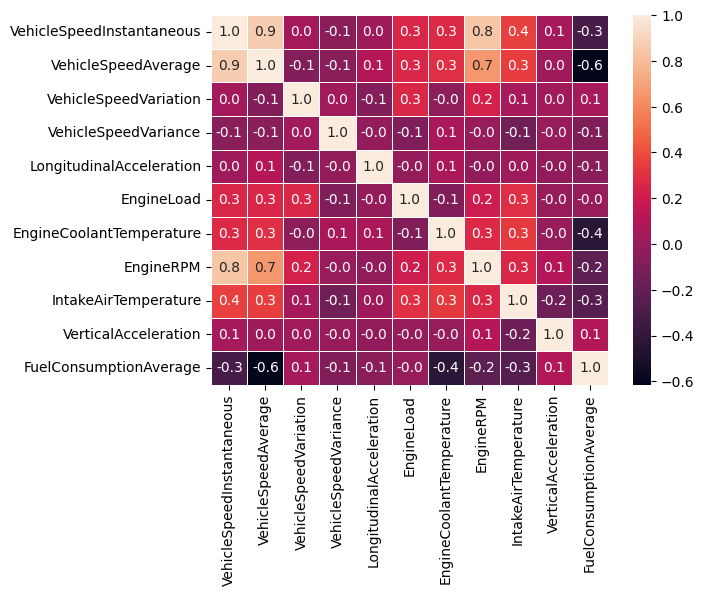

In [49]:
# Seleção de variaveis

features = [
    'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
    'VehicleSpeedVariation','VehicleSpeedVariance', 'LongitudinalAcceleration','EngineLoad',
    'EngineCoolantTemperature', 'EngineRPM', 'IntakeAirTemperature',
    'VerticalAcceleration', 'FuelConsumptionAverage',
]

correlation = df[features].corr()

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)


## Valores nulos

Valores ausentes para uma dada característica são substituídos pela média desta característica.

In [50]:
df = df.fillna(round(df.mean(),2))

df.head()

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-0.35,0.00,38.71,167.49,-0.0,156.0,25.49,64.0,100.0,801.0,7.85,22.0,-0.01,16.37,SmoothCondition,LowCongestionCondition,1
1,-0.35,0.00,38.71,167.49,-0.0,156.0,25.49,64.0,100.0,803.0,7.89,22.0,-0.02,16.37,SmoothCondition,LowCongestionCondition,1
2,-0.35,37.48,38.71,167.49,-0.0,273.0,25.88,64.0,100.0,800.0,7.77,22.0,-0.03,16.37,SmoothCondition,LowCongestionCondition,1
3,-0.35,37.48,38.71,167.49,-0.0,391.0,25.88,64.0,100.0,798.0,7.77,22.0,-0.03,16.37,SmoothCondition,LowCongestionCondition,1
4,-0.35,0.00,38.71,167.49,-0.0,469.0,25.88,65.0,100.0,798.0,7.94,22.0,-0.03,16.37,SmoothCondition,LowCongestionCondition,1


## Seleção de variáveis

In [51]:
X = df[features] # Features
y = df.drivingStyle # Variavel de classificação

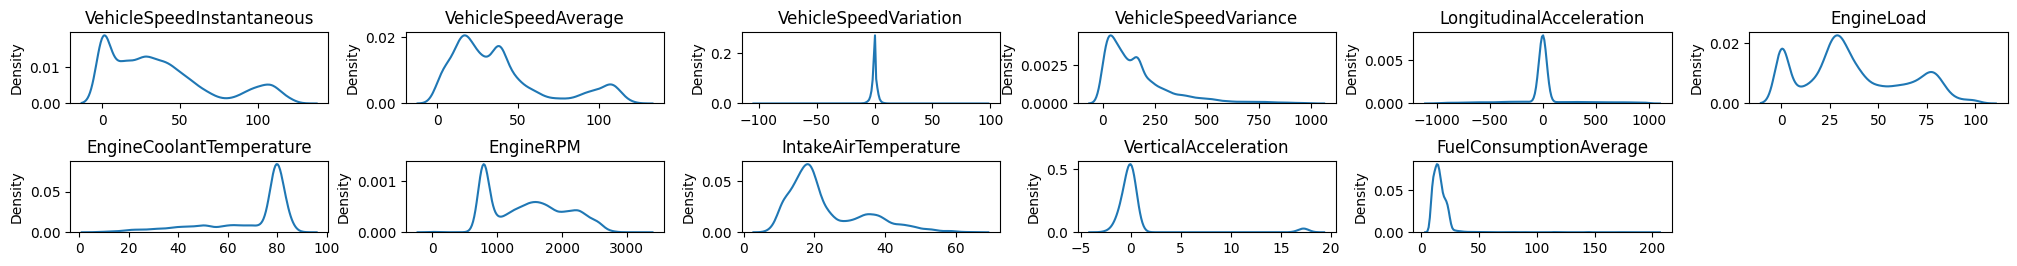

In [52]:
plt.figure(figsize=(25,21))

i = 1

for col in df[features].columns:
    plt.subplot(13,6,i)
    a = sns.kdeplot(df[col])
    plt.title(col)
    plt.xlabel('')
    plt.subplots_adjust(hspace=0.8)
    plt.subplots_adjust(wspace=0.3)
    i += 1

### Porcentagem de cada classe no conjunto de dados



In [53]:
target_count = labels.value_counts()

display((target_count/len(df)*100).round(2).to_frame("Estilo de direção" +" (%)").T)

,1,0
Estilo de direção (%),88.55,11.45


Classe desbalanceada, utilizaremos técnicas para balancear.


# Modelos

## Balanceamento dos dados:


In [54]:
'''
Para resolver o problema de oversample utilizamos a técnica SMOTE. 
A ideia por trás dela consiste em criar observações intermediárias entre dados parecidos, 
'''

from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

print('Dados reamostrados: %s' % Counter(y))

Dados reamostrados: Counter({1: 22004, 0: 22004})


# Modelos

In [55]:
# Função para criação da matriz de confusão.

'''
A matriz é uma tabela que permite a visualização do desempenho do algoritmo.
Cada linha da matriz representa as instâncias em uma classe prevista, enquanto 
cada coluna representa as instâncias em uma classe real (ou vice-versa).
'''
classes = ['0','1']

def matriz_confusao(y_val, y_pred, classes, nome):
    cm = metrics.confusion_matrix(y_val, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
        title=nome,
        ylabel="Rótulo Verdadeiro",
        xlabel="Previsão")

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2. else "black")
    fig.tight_layout()
    plt.show()

In [56]:
def importancia_atributos(importancias):
  for name, importance in zip(df[features], importancias):
      print(name, "=", importance)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


## DecisionTreeClassifier



In [58]:
'''
Entropia refere-se à impureza em um conjunto de dados. 
O ganho de informação é a diminuição da entropia. Ele calcula a diferença entre a 
entropia antes da divisão e a entropia média após a divisão do conjunto de dados
com base em determinados valores de atributo.
'''

arvore_decisao = DecisionTreeClassifier(criterion="entropy", max_depth=7)

arvore_decisao = arvore_decisao.fit(X_train,y_train)

dtc_predicao = arvore_decisao.predict(X_test)

print('Atributos importantes: \n')
importancia_atributos(arvore_decisao.feature_importances_)


Atributos importantes: 

VehicleSpeedInstantaneous = 0.30648088841260723
VehicleSpeedAverage = 0.10924663271071756
VehicleSpeedVariation = 0.029475039192184277
VehicleSpeedVariance = 0.1281359531997813
LongitudinalAcceleration = 0.00875703715987503
EngineLoad = 0.02263909972196721
EngineCoolantTemperature = 0.12778499040811217
EngineRPM = 0.07669835920794485
IntakeAirTemperature = 0.07109547291631133
VerticalAcceleration = 0.1128330857333465
FuelConsumptionAverage = 0.0068534413371524276


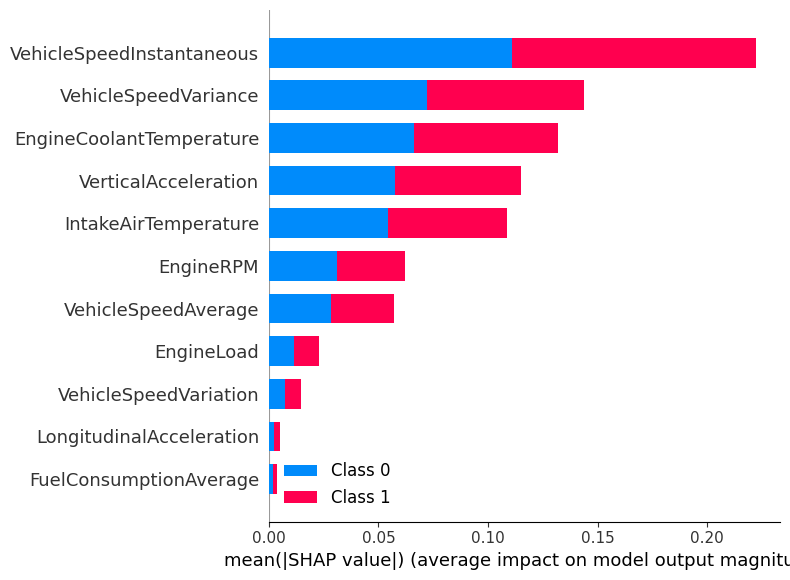

In [59]:
shap_values = shap.TreeExplainer(arvore_decisao).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

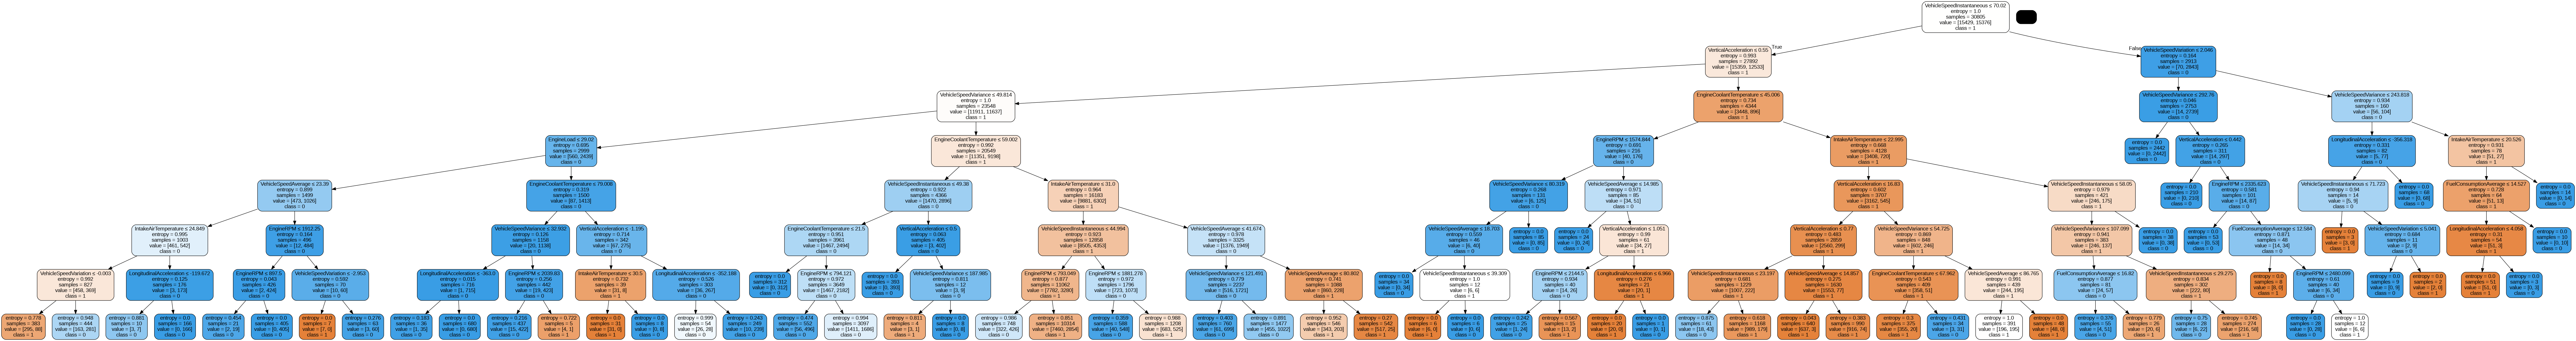

In [60]:
# Visualização da árvore

dot_data = StringIO()

export_graphviz(
    arvore_decisao, out_file=dot_data, filled=True, rounded=True,
    special_characters=True, feature_names = features, class_names=['1','0']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ArvoréDecisão.png')

Image(graph.create_png())

# SVM

In [61]:

support_vector = svm.SVC()
support_vector.fit(X_train, y_train)
svm_predicao = support_vector.predict(X_test)


# Random Forest

In [62]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

rf_predicao = random_forest.predict(X_test)

cv_results = cross_validate(random_forest, X_train, y_train, cv=3)
print(cv_results['test_score'].mean())

print('Atributos importantes: \n')
importancia_atributos(arvore_decisao.feature_importances_)


0.9562083675906834
Atributos importantes: 

VehicleSpeedInstantaneous = 0.30648088841260723
VehicleSpeedAverage = 0.10924663271071756
VehicleSpeedVariation = 0.029475039192184277
VehicleSpeedVariance = 0.1281359531997813
LongitudinalAcceleration = 0.00875703715987503
EngineLoad = 0.02263909972196721
EngineCoolantTemperature = 0.12778499040811217
EngineRPM = 0.07669835920794485
IntakeAirTemperature = 0.07109547291631133
VerticalAcceleration = 0.1128330857333465
FuelConsumptionAverage = 0.0068534413371524276


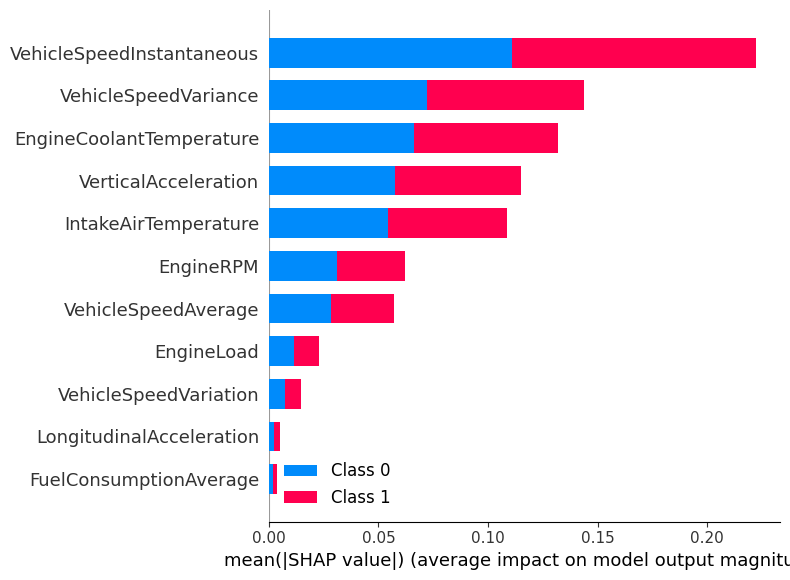

In [63]:
shap_values = shap.TreeExplainer(arvore_decisao).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

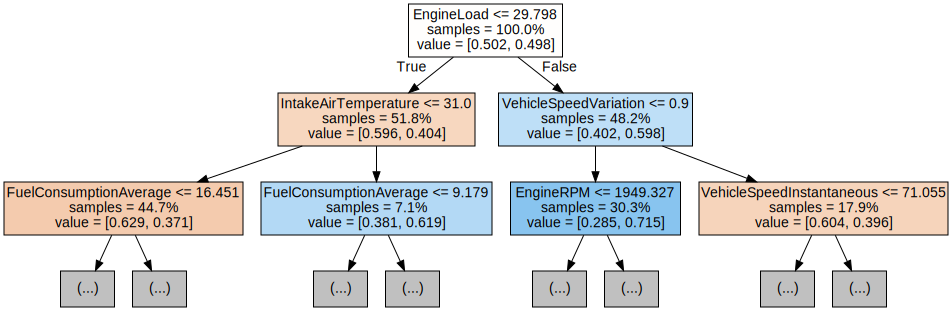

In [64]:
for i in range(1):
    tree = random_forest.estimators_[i]
    dot_data = export_graphviz(
        tree, feature_names=X_train.columns,filled=True,max_depth=2, impurity=False,proportion=True)
    
    graph = graphviz.Source(dot_data)
    display(graph)

# Resultados

In [65]:
# Acurácias e Precisão

def porcentagem(valor):
  return str(int(valor*100)) + '%'

print('Acurácia DecisionTree:', porcentagem(metrics.accuracy_score(y_test, dtc_predicao)))
print('Precisão DecisionTree:', porcentagem(metrics.precision_score(y_test, dtc_predicao)))

print('\nAcurácia SVM: ', porcentagem(metrics.accuracy_score(y_test, svm_predicao)))
print('Precisão SVM:', porcentagem(metrics.precision_score(y_test, svm_predicao)))

print('\nAcurácia Random Forest:', porcentagem(metrics.accuracy_score(y_test, rf_predicao)))
print('Precisão Random Forest:', porcentagem(metrics.precision_score(y_test, rf_predicao)))

Acurácia DecisionTree: 76%
Precisão DecisionTree: 80%

Acurácia SVM:  72%
Precisão SVM: 75%

Acurácia Random Forest: 96%
Precisão Random Forest: 98%


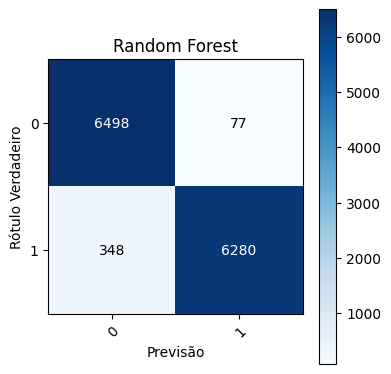

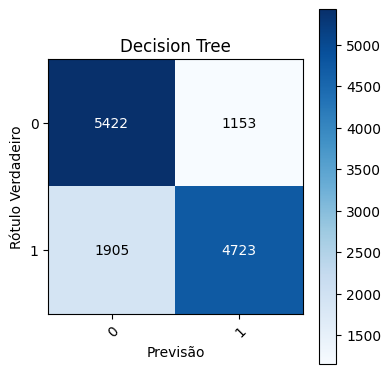

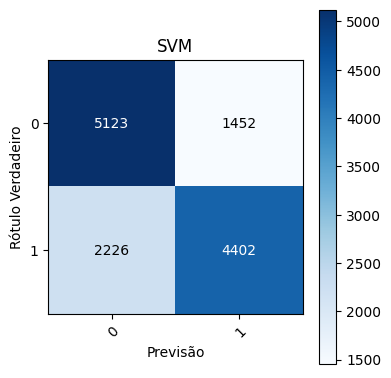

In [66]:
# Matriz Confusão

matriz_confusao(y_test,rf_predicao,classes,'Random Forest')
matriz_confusao(y_test,dtc_predicao,classes,'Decision Tree')
matriz_confusao(y_test,svm_predicao,classes,'SVM')